In [36]:
%matplotlib inline
import math
import pywt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import HBox, FloatSlider, IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import importlib
import toolbox
importlib.reload(toolbox)

<module 'toolbox' from '/home/roughl/projects/mathsem/polynoms/toolbox.py'>

In [37]:
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams.update({'font.size': 20})

In [38]:
from toolbox import *

In [4]:
def plot(wavelets):
    fig=plt.figure()
    ax = fig.add_axes([0,0,1,1])
    for wavlet in wavelets:
        w = pywt.Wavelet(wavlet)
        (phi, psi, x) = w.wavefun(level=10)
        line = ax.plot(x, phi)
        line = ax.plot(x, psi)

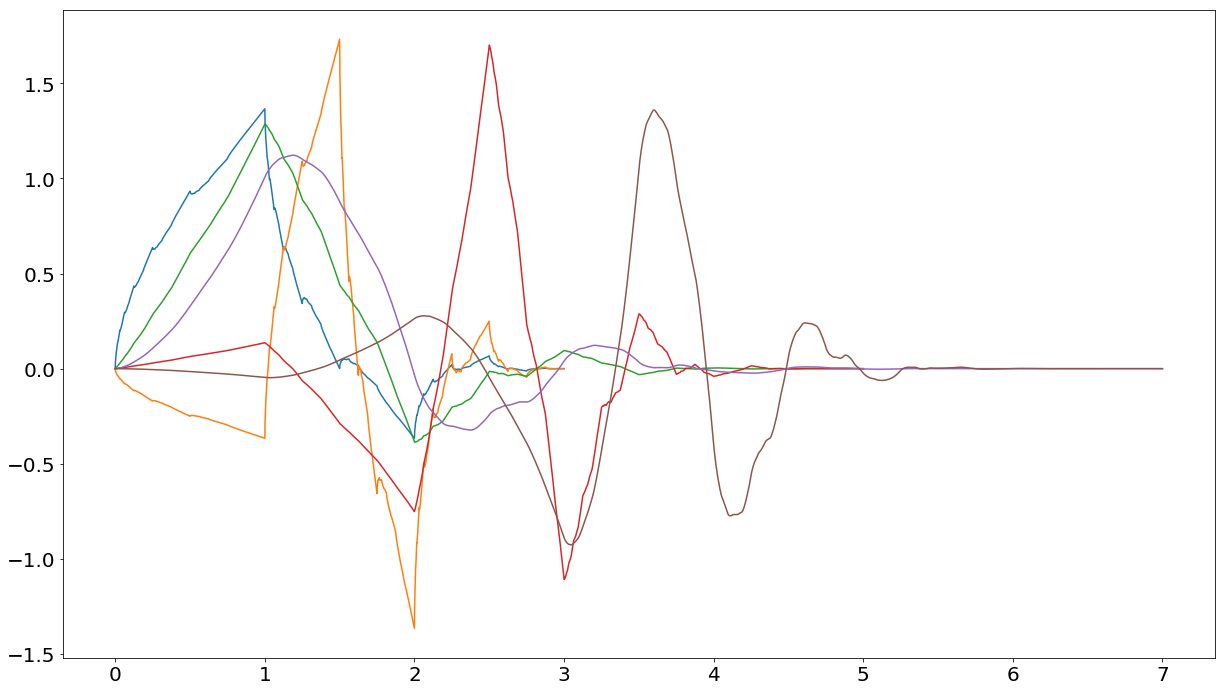

In [5]:
plot(['db2', 'db3', 'db4'])

# Merkmale der Wavelet Analyse

Raphael Nestler

2019-05-13

Mathematisches Seminar HSR

# Merkmale der Wavelet Analyse

 * Welche Information werden durch Wavelets extrahiert?
 * Welche Information werden durch Wavelets zerstört?

# Fokus

 * Analyse von 1D Signalen
   * Ausschliesslich Haar / DB Wavelets
   * Polynome
   * Mit Rauschen
   * Mit periodischen Elementen
 * Vergleich FFT
 * Anwendung zur Rauschunempfindlichen Ableitung?

# Anekdoten



In Dokumentation zu Implementierung wird oft nur von Detail und Approximation Koeffizienten gesprochen. Die Approximation sind der Tiefpass Output und die Detail dem Hochpass Output.

## Begriffe in der Praxis

 * 1 Stufige Wavelet Analyse
   * Detail und Approximation Koeffizienten
![DFT](https://upload.wikimedia.org/wikipedia/commons/4/45/Wavelets_-_DWT.png)
Quelle: Wikipedia

 * Mehrstufige Wavlet Analyse
    ![](https://upload.wikimedia.org/wikipedia/commons/2/22/Wavelets_-_Filter_Bank.png)

## Filter Einschwingverhalten
 * Filter brauchen Zeit zum Einschwingen
 * Einschwingen gibt Artefakte zu Begin und Ende -> Verwirrend

 * Was füttere ich rein?
   * 0er?
   * Konstanten?
   * Periodisierung?

![](https://pywavelets.readthedocs.io/en/latest/_images/plot_boundary_modes.png)
Quelle: https://pywavelets.readthedocs.io/

Bewährt haben sich "antireflect" und "smooth"

### Pragmatische Lösung

 * Längeres Signal verwenden und Koeffizienten am Rand wegwerfen 😉

# Analyse von Polynomen

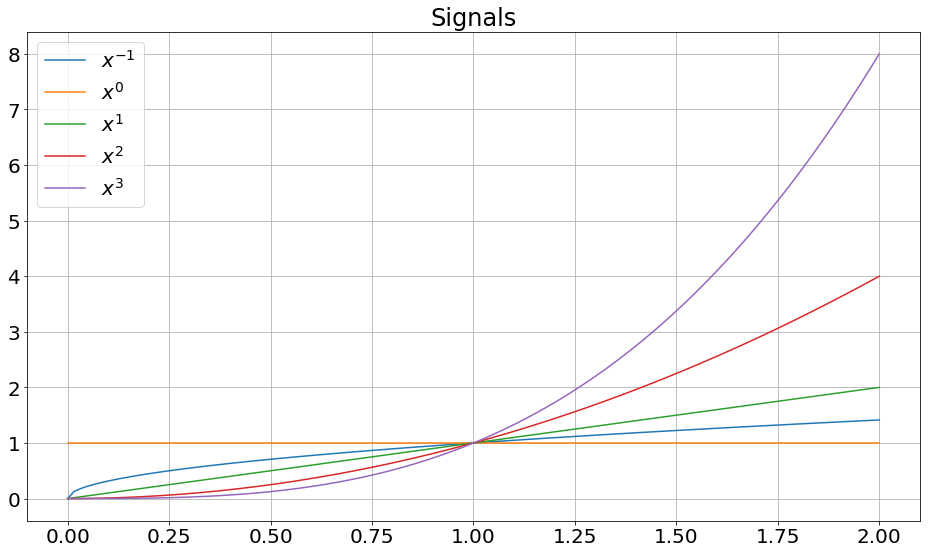

In [6]:
fig, data = print_signals(data_pure, labels);

## Warum Polynome?
> A vanishing moment limits the wavelets ability to represent polynomial behaviour or information in a signal. For example, D2, with one vanishing moment, easily encodes polynomials of one coefficient, or constant signal components. D4 encodes polynomials with two coefficients, i.e. constant and linear signal components; and D6 encodes 3-polynomials, i.e. constant, linear and quadratic signal components.

Source: https://en.wikipedia.org/wiki/Daubechies_wavelet

# Analyse mit Haar

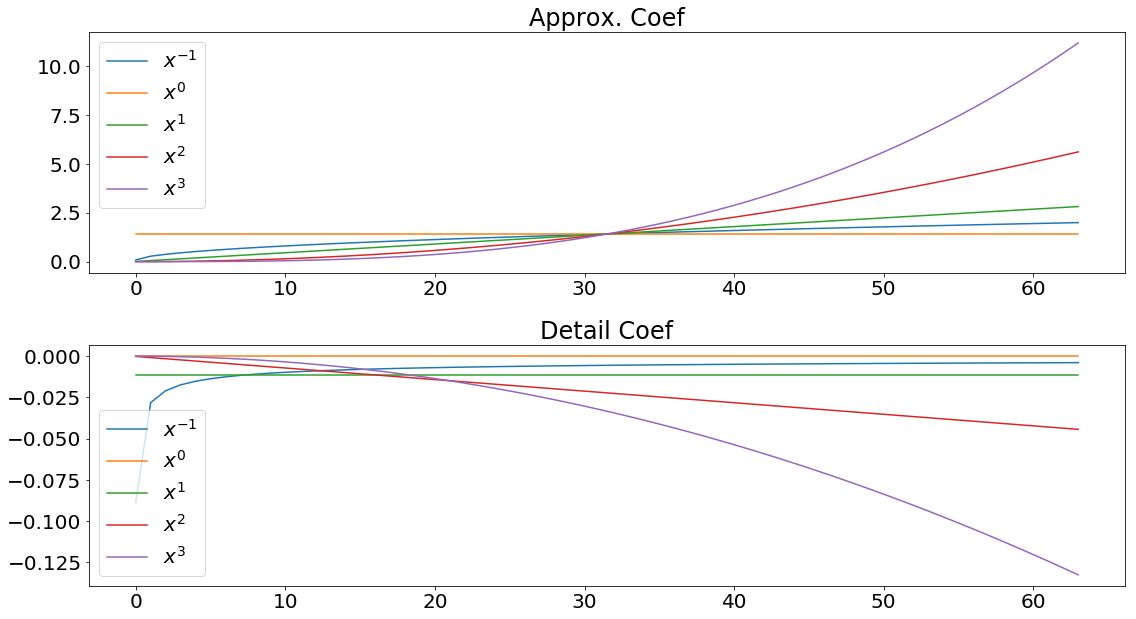

In [7]:
plot_wavelet_analysis(data_pure[:], labels[:], 'db1')

Die Detail Koeffizienten geben uns die Ableitung des Signals.
Intuitiv wenn man bedenkt was das Haar-Wavelet ist.

# Ableitung

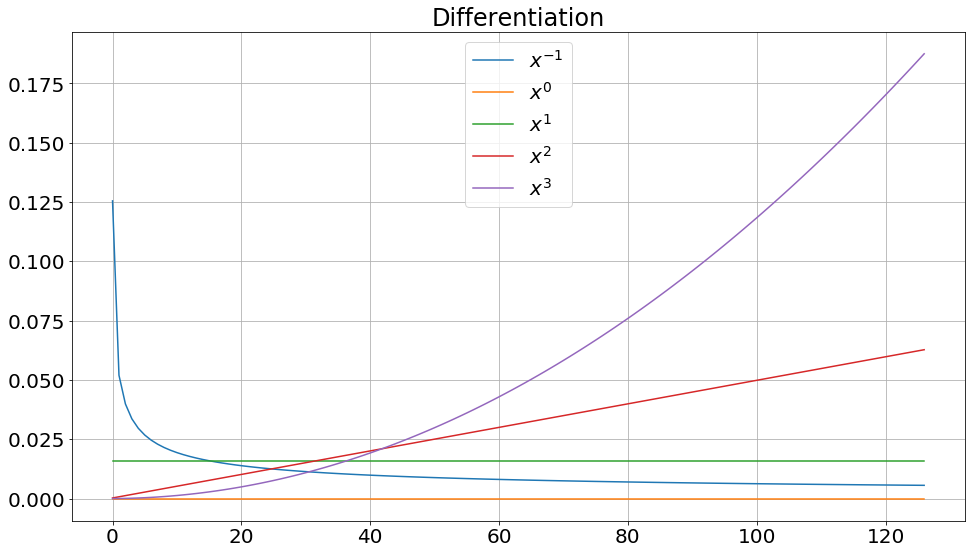

In [8]:
plot_differentation_analysis(data_pure[:], labels[:],  1)

## What if we tried more?
![XKCD What if we tried more](https://what-if.xkcd.com/imgs/a/13/laser_pointer_more_power.png)

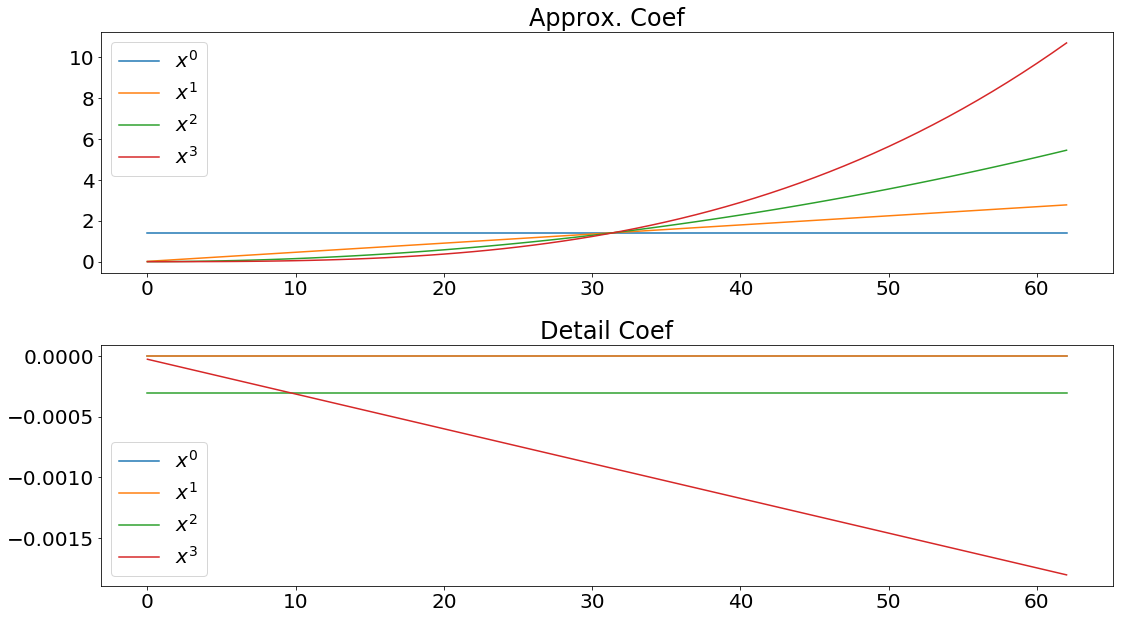

In [9]:
plot_wavelet_analysis(data_pure[1:], labels[1:], 'db2')

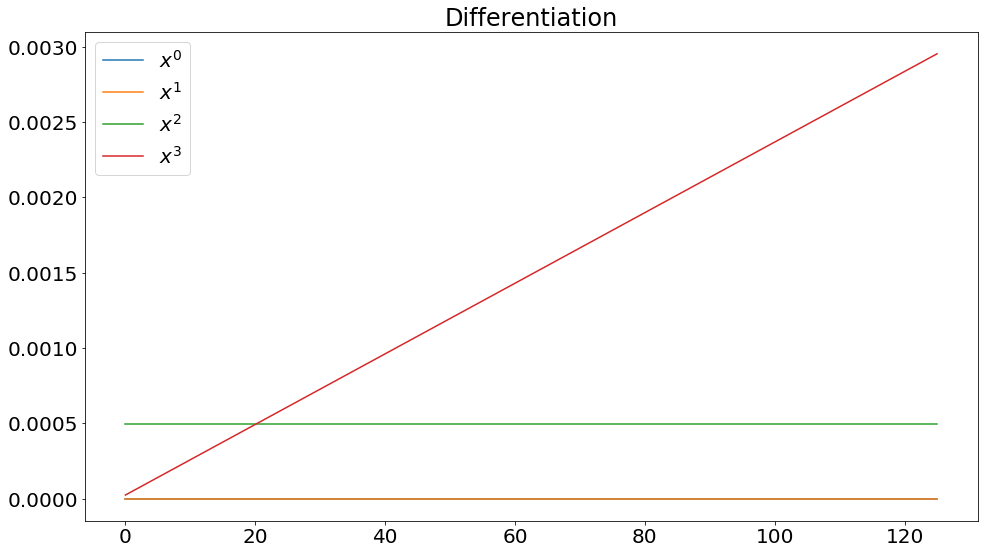

In [10]:
plot_differentation_analysis(data_pure[1:], labels[1:],  2)

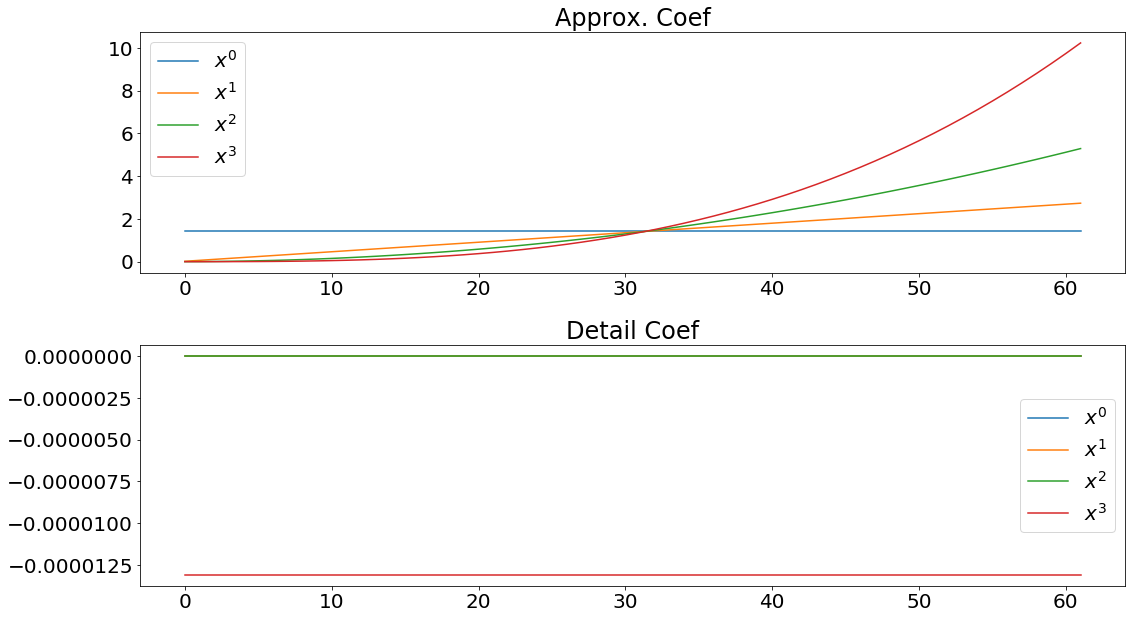

In [11]:
plot_wavelet_analysis(data_pure[1:], labels[1:], 'db3')

## Fazit

 * DB-N Wavelets geben uns die N-te Ableitung des Signals in den Detail Koeffizienten
 * N-te Ableitung lässt sich direkt berechnen

# Differenzieren von verrauschten Signalen

 * Rauschen "explodiert" bei mehrfachem nummerischen Differenzieren
 * Könnten wir das mit Wavlets umgehen?

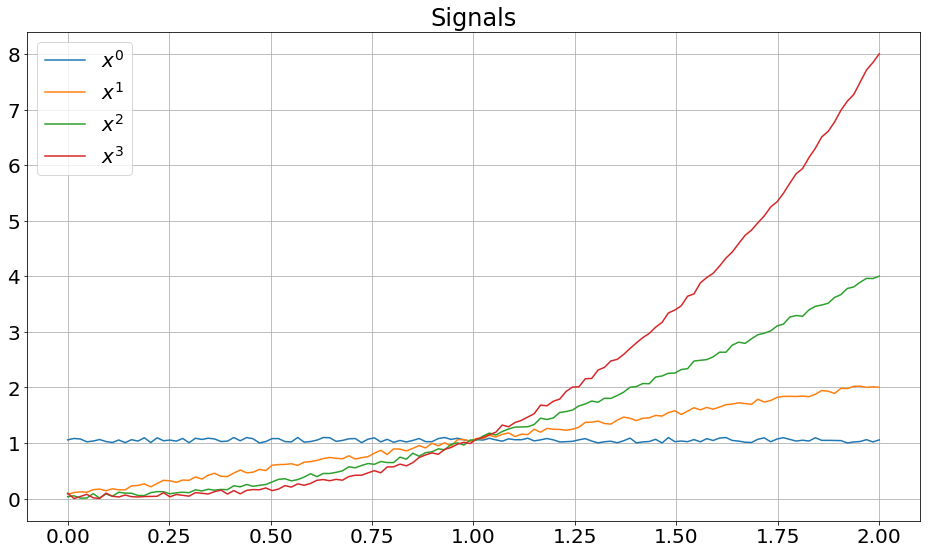

In [12]:
print_signals(data_with_noise[1:], labels[1:]);

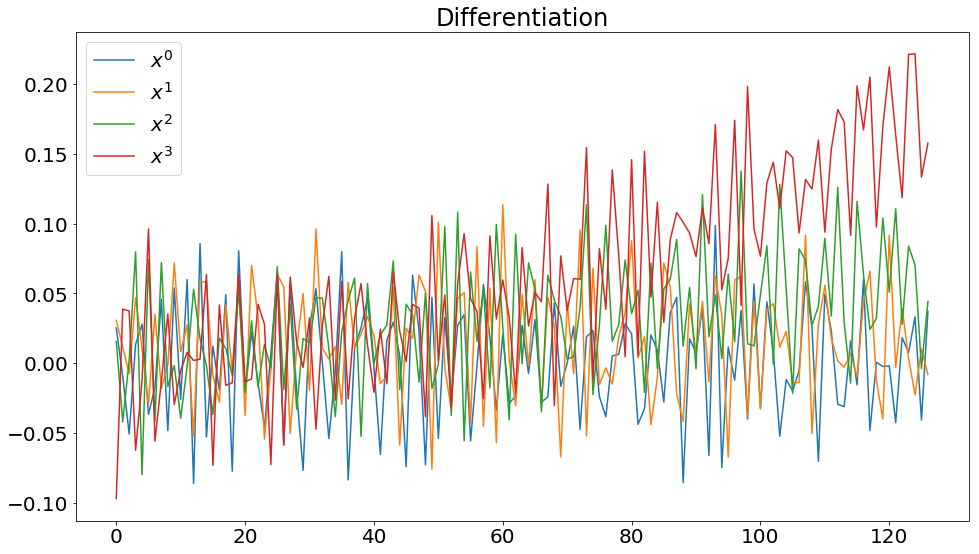

In [13]:
plot_differentation_analysis(data_with_noise[1:], labels[1:], 1)

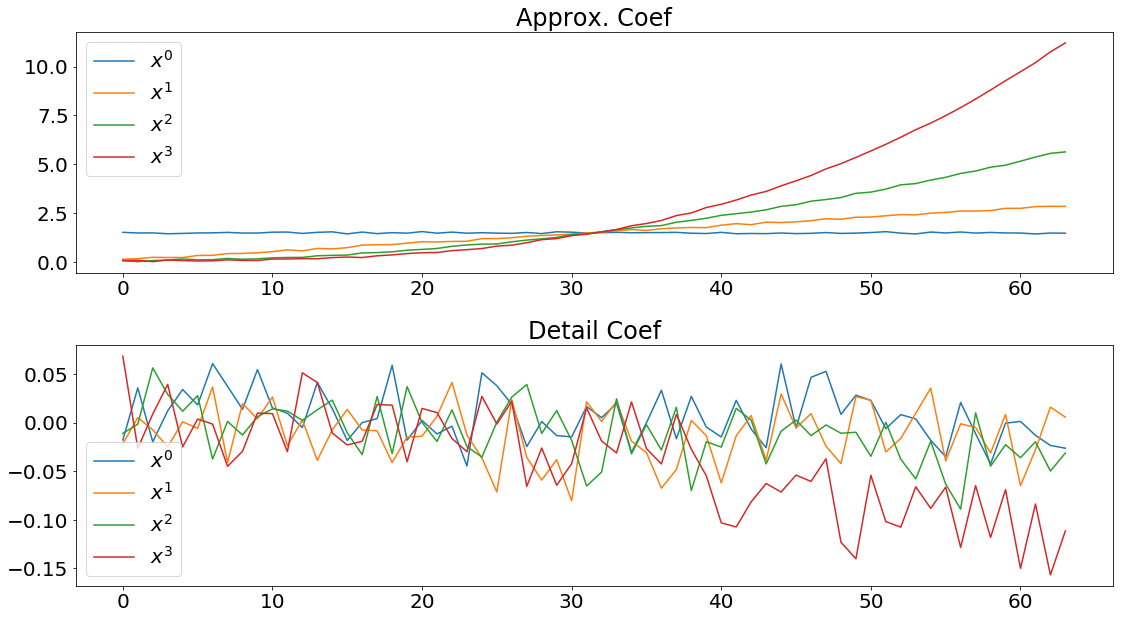

In [14]:
plot_wavelet_analysis(data_with_noise[1:], labels[1:], 'db1')

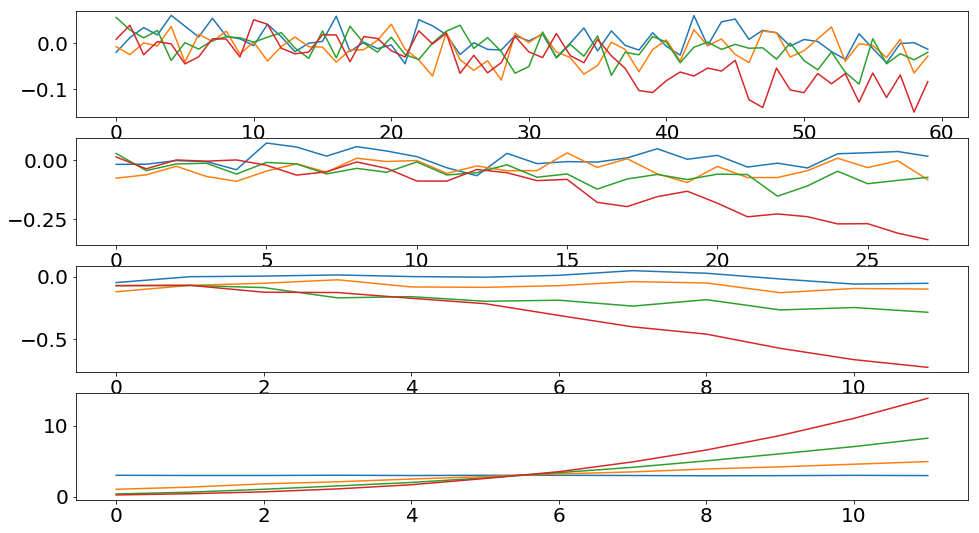

In [15]:
plot_dwt_multi_level(data_with_noise[1:], labels[1:], 'db1', plt.figure(), 3)

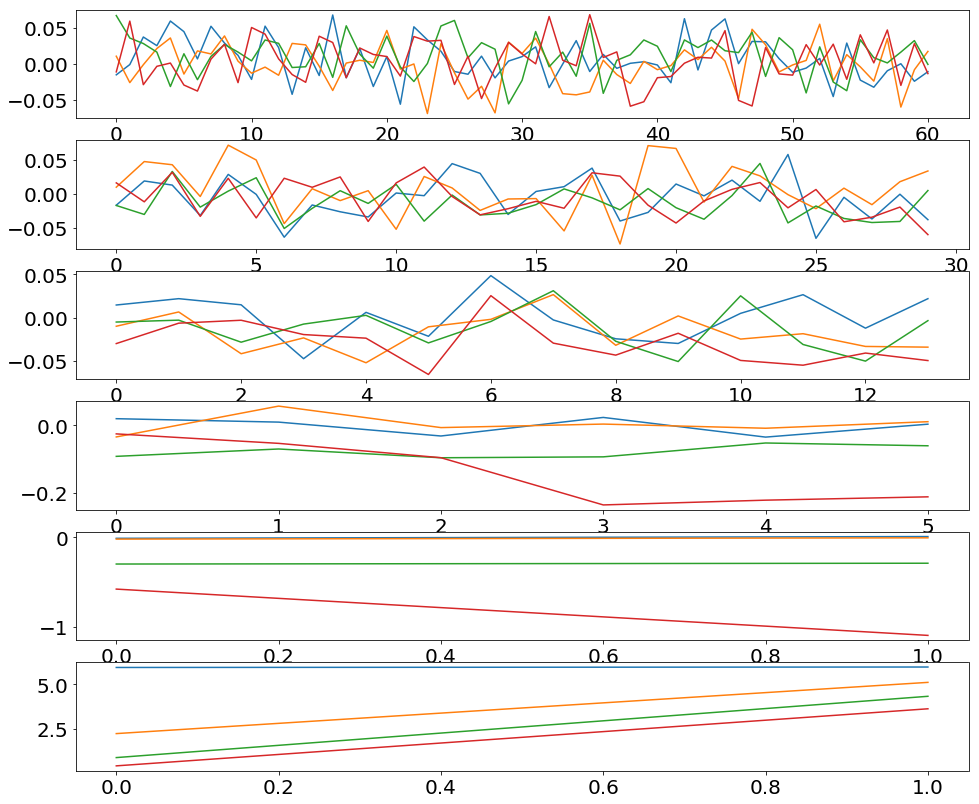

In [16]:
fig = plt.figure(figsize=[16, 14])
plot_dwt_multi_level(data_with_noise[1:], labels[1:5], 'db2', fig, 5)

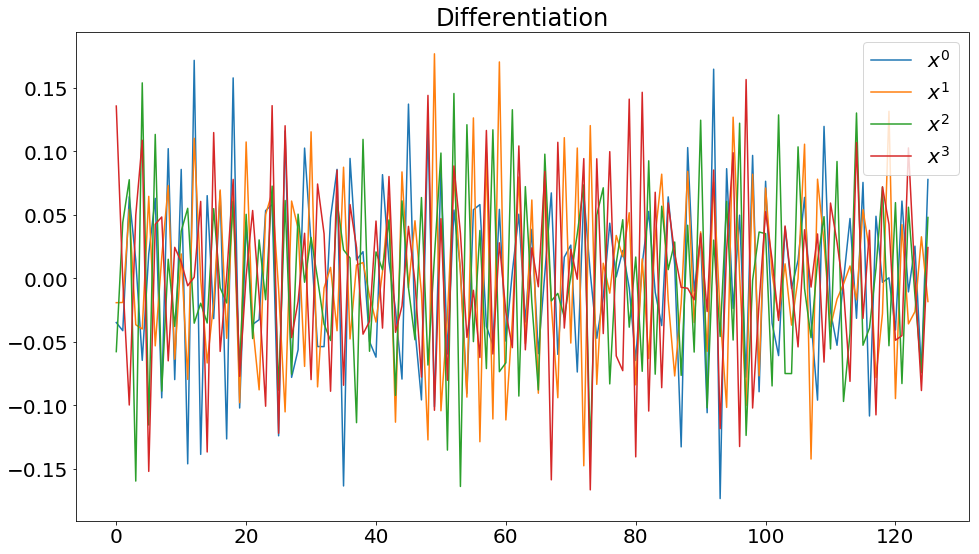

In [17]:
plot_differentation_analysis(data_with_noise[1:], labels[1:], 2)

## Demo Time

## Fazit

 * DB Wavelets können verrauschte Signale differenzieren
 * Das entspricht in etwa dem Standardvorgehen: Mitteln und dann differenzieren

# Polynome mit Sinus

## Ziel: Hochfrequentes Signal detektieren

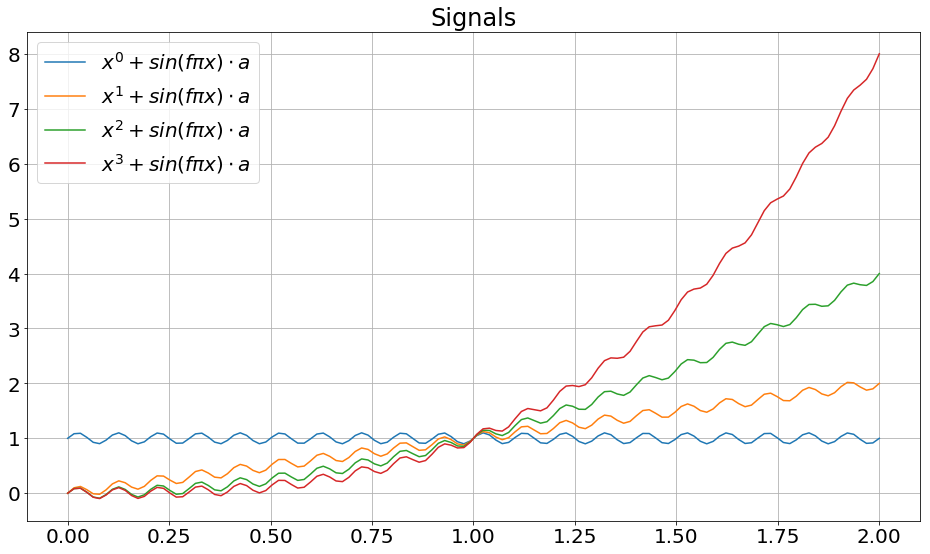

In [18]:
print_signals(data_with_sin[1:], labels_sin[1:]);

## FFT 
Peak bei 20 geht unter

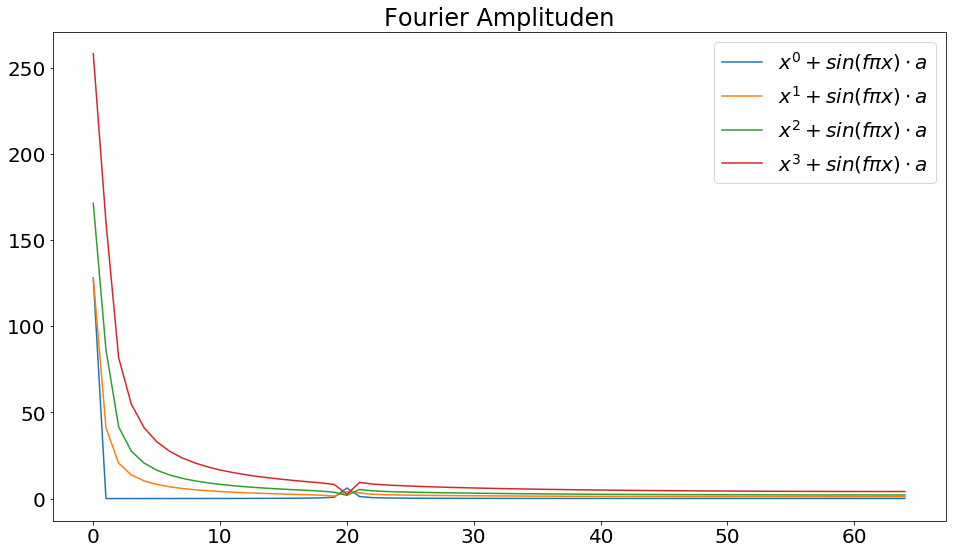

In [19]:
plot_fft_analysis(data_with_sin[1:], labels_sin[1:])

## Wavelet
Polynom im Tiefpass codiert. Hochpass sieht Sinus perfekt.

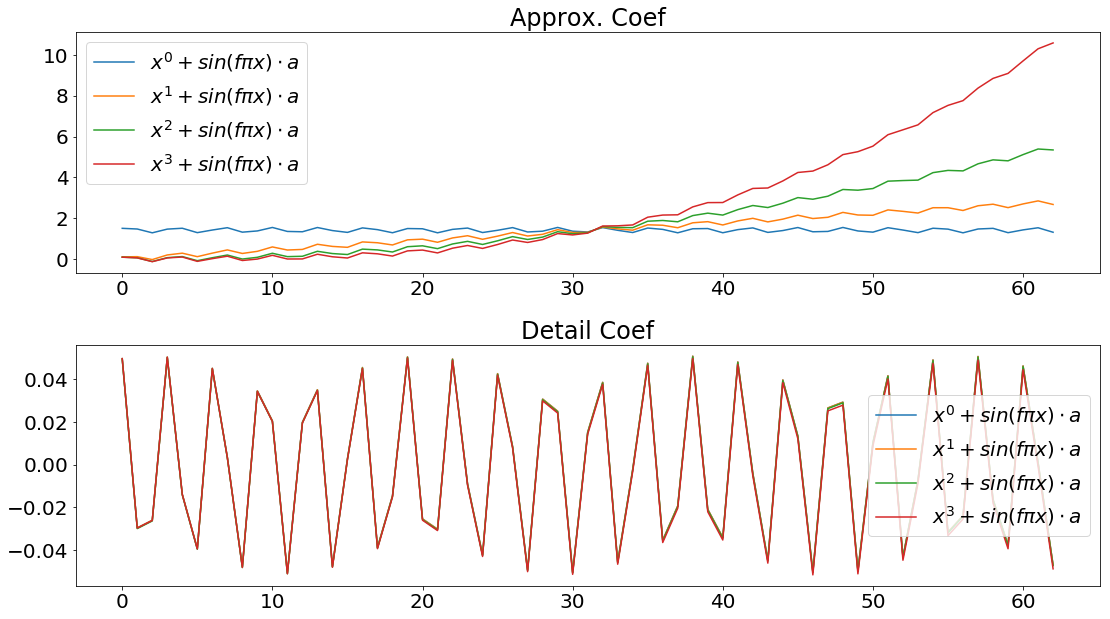

In [20]:
plot_wavelet_analysis(data_with_sin[1:], labels_sin[1:], 'db2')

## Demo Time
Analyse von Sinus Signalen

## Fazit

 * DB Wavelets eignen sich um Hochfrequente Komponenten in Signalen mit polynomieller Basis zu detektieren
 * FFT Zeit Global
 * Wavlets Lokal

# Verschobene Polynome

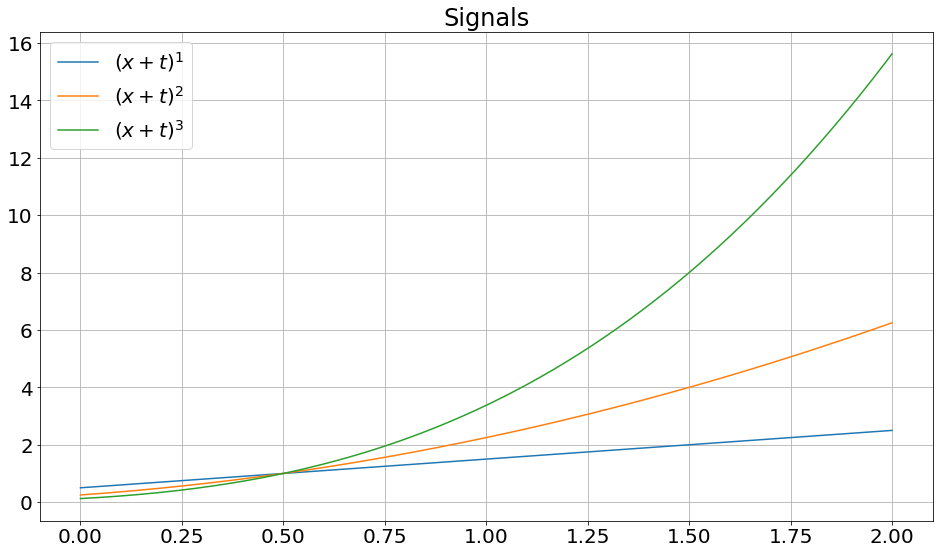

In [33]:
print_signals(data_shifted[2:], labels_shifted[2:]);

$(x+t)^3 = x^3 + 3 t x^2 + 3 t^2 x + t^3$

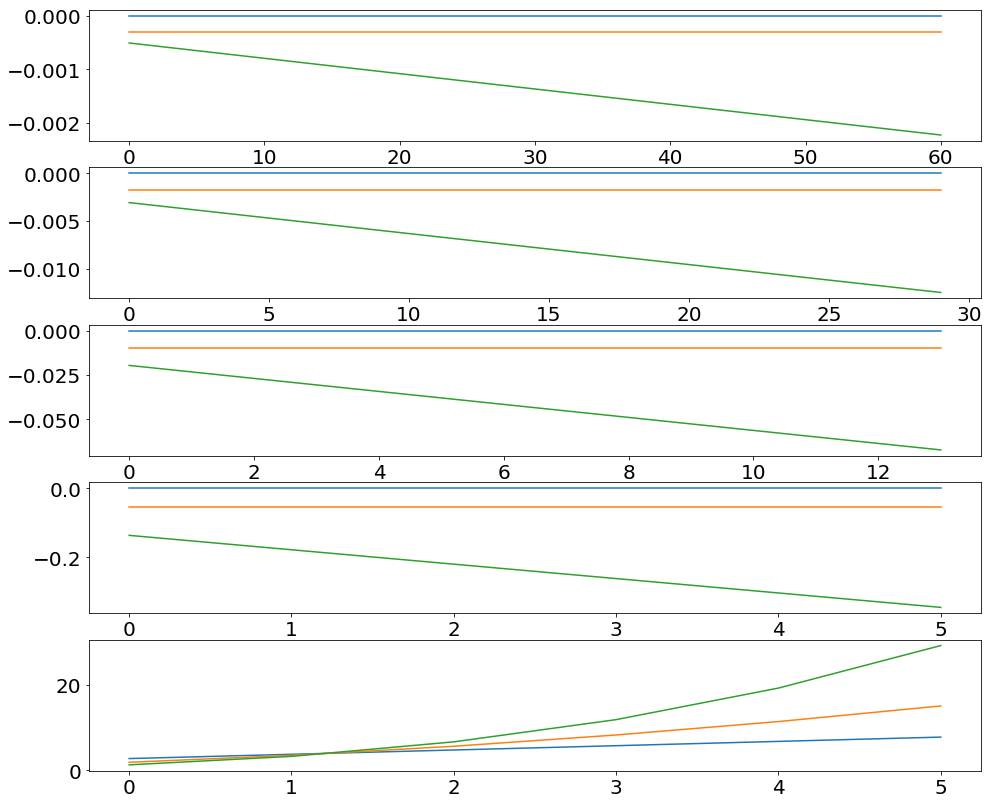

In [45]:
fig = plt.figure(figsize=[16, 14])
plot_dwt_multi_level(data_shifted[2:], labels_shifted[2:], 'db2', fig, level=4, axis_limit=0.0)

# Information von Wavlets

 * Lokal: Hohe Frequenzen / Ableitung
 * Global: "DC"
 * Fliessender Übergang bei mehrstufiger Analyse

# Information DFT
 
 * Lokal: Nichts
 * Global: Jede einzelne Frequenz
 * Kompomiss mit gefensteter DFT

## Demo Time
Verrauschte Sinus Signale